In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import json

import numpy as np
import seaborn as sns
import h5py

from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import regularizers
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers

from helpers import performance_eval, plot_samples, training_eval, save_summary, save_json, load_json, random_init

model = load_json('final')
model.load_weights('models/final_weights.h5') 

sns.set()
sns.set_style("dark")

# Same random each run
random_init(42)

# Import MNIST dataset and labels from Keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Use seaborn for plots
sns.set()
sns.set_style("dark")

# Convert data to floating point and normalize to range 0-1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# Reshape data for input to Conv2D layer
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Convert class labels to categorical data/one-hot encoding
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

# Predict and evaluate performance
y_fit = model.predict(X_test, batch_size=128)
performance_eval('final', y_fit.argmax(axis=1), y_test.argmax(axis=1))
print(y_fit.argmax(axis=1))
print(y_test.argmax(axis=1))
print(np.where(np.equal(y_fit,y_test)))

Using TensorFlow backend.


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



final accuracy: 0.99060
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
(array([], dtype=int64), array([], dtype=int64))


In [3]:
np.shape(y_fit.argmax(axis=1))

(10000,)

In [7]:
misclassifieds = X_test[np.where(y_fit.argmax(axis=1) != y_test.argmax(axis=1))]

In [22]:
def plot_samples(data, title='samples', width=3,height=3):
    subplot_no = 1
    for sample in data:
        plt.subplots_adjust(hspace=0.8, wspace=0.8)
        plt.subplot(width,height,subplot_no)
        subplot_no = subplot_no +1
        plt.suptitle(title)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(sample, cmap='Greys')    
    plt.savefig('output/' + title + '.png', bbox_inches='tight', dpi=1200)

In [13]:
np.shape(misclassifieds.reshape(94,28,28))

(94, 28, 28)

MNIST misclassifieds - predicted labels
[[0 0 5 2 1 5 3 5 9 5 1 8]
 [2 4 5 1 5 3 7 9 7 5 3 4]
 [5 3 7 0 9 1 8 0 1 4 0 4]
 [3 5 1 0 2 5 5 5 9 0 1 4]
 [0 5 3 3 8 2 6 8 4 6 4 2]
 [7 0 7 8 4 2 7 5 4 4 3 5]
 [8 8 9 5 9 5 7 7 1 7 2 8]
 [6 8 5 2 2 2 8 3 6 0 0 0]]

MNIST misclassifieds - target labels
[[6 6 3 8 2 3 1 3 8 6 7 7]
 [7 9 9 7 3 8 9 7 8 9 8 9]
 [6 5 3 6 4 6 5 9 9 9 2 2]
 [5 9 6 8 3 9 3 3 7 6 9 6]
 [5 8 9 2 6 7 4 7 9 4 9 9]
 [2 2 9 2 9 3 8 3 9 9 2 3]
 [3 3 5 3 3 9 9 1 7 0 8 0]
 [1 7 8 7 7 7 0 6 5 5 6 6]]


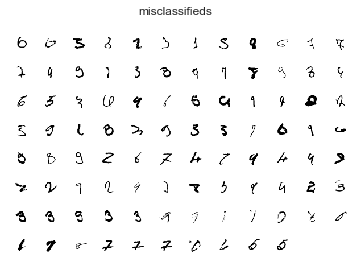

In [40]:
mis_index = np.where(y_fit.argmax(axis=1) != y_test.argmax(axis=1))
misclassifieds = X_test[mis_index]
predicted_labels = y_fit.argmax(axis=1)[mis_index]
target_labels = y_test.argmax(axis=1)[mis_index]
print('MNIST misclassifieds - predicted labels')
print(np.resize(predicted_labels, 8*12).reshape((8,12)))
print('\nMNIST misclassifieds - target labels')
print(np.resize(target_labels, 8*12).reshape((8,12)))

plot_samples(misclassifieds.reshape(94,28,28), title='MNIST_misclassifieds', width=8, height=12)

